In [52]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from utils import get_path

paths = get_path()

In [53]:

triage = pd.read_csv(os.path.join(paths['raw_ed'],'triage.csv'))
diagnosis = pd.read_csv(os.path.join(paths['raw_ed'],'diagnosis.csv'))
edstays = pd.read_csv(os.path.join(paths['raw_ed'],'edstays.csv'))
#vitalsign = pd.read_csv(os.path.join(paths['raw_ed'],'vitalsign.csv'))
#pyxis = pd.read_csv(os.path.join(paths['raw_ed'],'pyxis.csv'))
#medrecon = pd.read_csv(os.path.join(paths['raw_ed'],'medrecon.csv'))

KeyboardInterrupt: 

# Study the population

In [ ]:
edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED


In [ ]:
#Statistics on the number of patients
print(f"Unique patients: {edstays['subject_id'].nunique()} patients")
print(f"Unique hospital admissions: {edstays['hadm_id'].nunique()} admissions")
print(f"Unique emergency stays: {edstays['stay_id'].nunique()} stays")
print(f"Rate of women: {len(edstays[edstays['gender'] == 'F'])/len(edstays)} ")


Unique patients: 205504 patients
Unique hospital admissions: 202441 admissions
Unique emergency stays: 425087 stays
Rate of women: 0.5408257603737587 


493.06944444444446
Number of stays above 24 hours: 11896
Number of stays above 48 hours: 1249


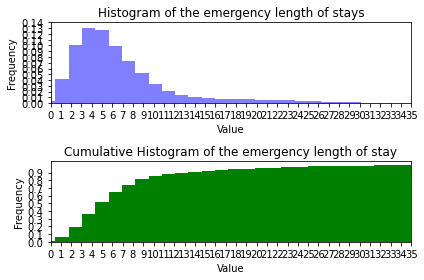

In [ ]:
# statistics on the length of stay

edstays['outtime'] = pd.to_datetime(edstays['outtime'], format = "%Y-%m-%d %H:%M:%S")
edstays['intime'] = pd.to_datetime(edstays['intime'], format = "%Y-%m-%d %H:%M:%S")
edstays['los'] = (edstays['outtime'] - edstays['intime']).dt.days *24 + (edstays['outtime'] - edstays['intime']).dt.seconds /3600
print(max(edstays['los']))
print(f"Number of stays above 24 hours: {len(edstays[edstays['los']>24])}")
print(f"Number of stays above 48 hours: {len(edstays[edstays['los']>48])}")
# Create a figure and axis object for subplots
fig, axs = plt.subplots(2)
# Plot the histograms on the subplots
axs[0].hist(edstays['los'], bins=400, color='blue', alpha=0.5, density = True)
axs[0].set_title('Histogram of the emergency length of stays')
axs[0].set_yticks(np.arange(0, 0.15, 0.01))  # Set ticks on y-axis

axs[1].hist(edstays['los'], bins=400, color='green', cumulative=True, density = True)
axs[1].set_title('Cumulative Histogram of the emergency length of stay')
axs[1].set_yticks(np.arange(0, 1, 0.1))  # Set ticks on y-axis

# Add titles and labels
# Add labels
for ax in axs:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_xlim([0,30])
    ax.set_xticks(np.arange(0, 36,1 ))  # Set ticks on x-axis
# Adjust layout
plt.tight_layout()

In [ ]:
women = edstays[edstays.gender == 'F']
men = edstays[edstays.gender == 'M']
edstays['los'].describe()

count    425087.000000
mean          7.158327
std           6.628000
min         -22.733333
25%           3.533333
50%           5.466667
75%           8.316667
max         493.069444
Name: los, dtype: float64

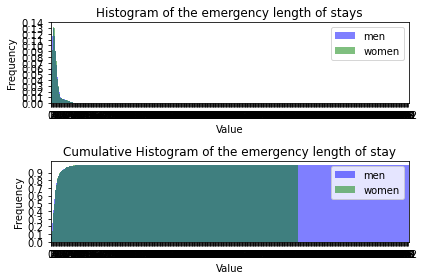

In [ ]:
# length of stay for men and women
fig, axs = plt.subplots(2)
# Plot the histograms on the subplots
axs[0].hist(men['los'], bins=400, color='blue', alpha=0.5,  density = True, label = 'men')
axs[0].hist(women['los'], bins=400, color='green', alpha=0.5, density = True, label = 'women')
axs[0].set_title('Histogram of the emergency length of stays')
axs[0].set_yticks(np.arange(0, 0.15, 0.01))  # Set ticks on y-axis

axs[1].hist(men['los'], bins=400, color='blue', cumulative=True, alpha=0.5,density = True, label = 'men')
axs[1].hist(women['los'], bins=400, color='green', cumulative=True,density = True, alpha = 0.5, label = 'women')
axs[1].set_title('Cumulative Histogram of the emergency length of stay')
axs[1].set_yticks(np.arange(0, 1, 0.1))  # Set ticks on y-axis

# Add titles and labels
# Add labels
for ax in axs:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_xlim([0,493])
    ax.set_xticks(np.arange(0, 493,1 ))  # Set ticks on x-axis
    ax.legend()
# Adjust layout
plt.tight_layout()

In [ ]:
print("statistics length of stay for men")
print(men['los'].describe())
print("statistics length of stay for women")
print(women['los'].describe())

statistics length of stay for men
count    195189.000000
mean          7.160791
std           6.877934
min         -22.433333
25%           3.433333
50%           5.383333
75%           8.350000
max         493.069444
Name: los, dtype: float64
statistics length of stay for women
count    229898.000000
mean          7.156234
std           6.408167
min         -22.733333
25%           3.607222
50%           5.516667
75%           8.300000
max         341.039722
Name: los, dtype: float64


['ADMITTED' 'HOME' 'LEFT WITHOUT BEING SEEN' 'TRANSFER' 'ELOPED' 'OTHER'
 'LEFT AGAINST MEDICAL ADVICE' 'EXPIRED']


Text(0, 0.5, 'Frequency')

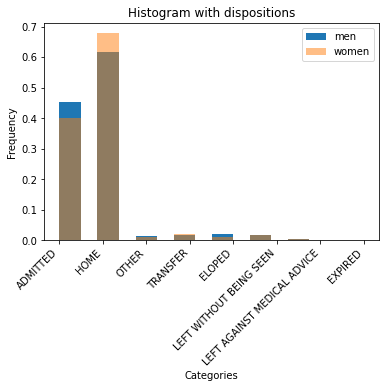

In [ ]:
# distribution of men/women between qdmitted/home
print(edstays['disposition'].unique())
plt.hist(men['disposition'],bins=8, width=0.5, density=True, label = 'men')
plt.hist(women['disposition'],bins=8, width=0.5, alpha = 0.5, density=True, label = 'women')
plt.xticks(edstays['disposition'].unique(), rotation=45, ha='right')
plt.legend()
# Title and labels
plt.title('Histogram with dispositions')
plt.xlabel('Categories')
plt.ylabel('Frequency')


In [ ]:
print("statistics dispositions for men")
print(men['disposition'].value_counts())
print(men['stay_id'].nunique())
print("statistics dispositions for women")
print(women['disposition'].value_counts())
print(women['stay_id'].nunique())

print("statistics dispositions for men")
print(men['disposition'].value_counts()/len(men['disposition']))
print(men['stay_id'].nunique())
print("statistics dispositions for women")
print(women['disposition'].value_counts()/len(women['disposition']))
print(women['stay_id'].nunique())

statistics dispositions for men
HOME                           105189
ADMITTED                        77426
ELOPED                           3454
TRANSFER                         2973
LEFT WITHOUT BEING SEEN          2758
OTHER                            2183
LEFT AGAINST MEDICAL ADVICE      1006
EXPIRED                           200
Name: disposition, dtype: int64
195189
statistics dispositions for women
HOME                           136443
ADMITTED                        80584
TRANSFER                         4052
LEFT WITHOUT BEING SEEN          3397
ELOPED                           2256
OTHER                            2114
LEFT AGAINST MEDICAL ADVICE       875
EXPIRED                           177
Name: disposition, dtype: int64
229898
statistics dispositions for men
HOME                           0.538908
ADMITTED                       0.396672
ELOPED                         0.017696
TRANSFER                       0.015231
LEFT WITHOUT BEING SEEN        0.014130
OTHER           

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
observed = np.array([[men[men['disposition'] == 'HOME']['disposition'].count(), men[men['disposition'] == 'ADMITTED']['disposition'].count()],
                     [women[women['disposition'] == 'HOME']['disposition'].count(), women[women['disposition'] == 'ADMITTED']['disposition'].count()]])
print(observed)
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

[[105189  77426]
 [136443  80584]]
Chi-Squared Statistic: 1150.876788383664
P-value: 2.8928760750773854e-252
Degrees of Freedom: 1
Expected Frequencies:
 [[110412.88873542  72202.11126458]
 [131219.11126458  85807.88873542]]


# Define available input variables

In [ ]:
triage.head()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [ ]:
triage.columns

Index(['subject_id', 'stay_id', 'temperature', 'heartrate', 'resprate',
       'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint'],
      dtype='object')

In [ ]:
# frequency of missing data for each parameter

parameters = ['temperature','heartrate','resprate','o2sat','sbp','dbp']

for p in parameters:
    temp = triage[['stay_id',p]].dropna()
    print(f"frequency of missing {p}: {1 - len(temp)/triage.stay_id.nunique()}")



frequency of missing temperature: 0.055082841865312315
frequency of missing heartrate: 0.04020353480581618
frequency of missing resprate: 0.04787961052678624
frequency of missing o2sat: 0.04845125821302465
frequency of missing sbp: 0.04302883880240982
frequency of missing dbp: 0.04491080649372947


Almost all patients have all parameters (missingness is between 4.0% and 5.5%). It seems that we can consider it as MCAR but to be checked.

In [ ]:
# correlation between missingness and disease or complain

In [ ]:

# Create DataFrame
df = triage[['subject_id', 'stay_id', 'chiefcomplaint']]

# Split the 'symptoms' column by ':' and expand into separate columns
symptoms_split = df['chiefcomplaint'].str.split(',', expand=True)

# Concatenate the split columns with the original DataFrame
df_split = pd.concat([df['stay_id'], symptoms_split], axis=1)

# Rename the columns
df_split.columns = ['stay_id'] + [f'{i+1}' for i in range(symptoms_split.shape[1])]

df_complaints = pd.melt(df_split, id_vars=['stay_id'], value_vars=['1', '2', '3', '4',
       '5', '6'], var_name='indice_complaints', value_name='chiefcomplaint')

# Drop rows with NaN values in 'symptom' column
df_complaints = df_complaints.dropna(subset=['chiefcomplaint'])

df_complaints['indice_complaints'] = df_complaints['indice_complaints'].astype(int)
df_complaints['number_of_complaints'] = df_complaints.groupby('stay_id')['indice_complaints'].transform('max')

df_complaints.drop(columns=['indice_complaints'],inplace=True) # can be reused to know the number of symptoms per patient

# Reset index
df_complaints.reset_index(drop=True, inplace=True)

df_complaints

,stay_id,chiefcomplaint,number_of_complaints
0,32952584,Hypotension,1
1,33258284,Abd pain,2
2,35968195,n/v/d,2
3,38112554,Abdominal distention,1
4,39399961,Abdominal distention,3
...,...,...,...
585753,37609640,Transfer,6
585754,39644209,Difficulty swallowing,6
585755,38958232,R Numbness,6
585756,39776494,Transfer,6


In [17]:
dict_diagnosis = {'trauma':['injury','drug',"fall ","fall/","fx","trauma",'wound',
                         "ped struck", "traumatic", "injury",'laceration','strike',
                        "mvc", "od", "s/p arrest", "fracture","lesion",'assault','cat bite',
                            "run over","accident","burn",'torn','dog bite'],
                  'cardiac arrest':['cardiac arrest','infarction'],
                  'infection':['cellulitis','meningitis','infection','septic','septis','bronchitis','pneumonia', 'influenza','ili'],
                  'burn':['burn'],
                  'other':["appendicits","lyme","device","fascitis","allergic","pregnan","witnessed","chemo","post op",
                           "blockage","crohns","s/p",'transfer',
                           'abcess','biopsy','colostomy',"pneumothorax","suture",'disection','detox','tracheostomy',
                             "exposure",'equipment','catheter','medication','drug','overdose','etoh','substance','food']}

dict_symptom = {'pain':['pain','c/p','tightness'],
                'jaundice':['jaundice'],
                'hyperglycemia':['hyperglycemia'],
                'dehydration':['dehydration'],
                'Hematemesis':['hematemesis','vomiting blood'],
                'distention':['distention'],
                'nausea':['nausea','vomit','n/v'],
                'swelling':['swelling'],
                'tachycardia':['palpitation','tachycardia'],
                'pain':['pain'],
                'bleed':['bleed','blood','hemorrhage','bld','booldy'],
                'fatigue':['lethargy','weak','fatigue'],
                'fever':['fever'],
                  'cough':['cough'],
                  'itch':['itch'],
                  'paralysis':['paralysis'],
                  'diarrhea':['diarrhea'],
                  'dizzy':['dizzy','syncop','n/v/d','dizziness'],
                  'hemorroids':['hemorroids','brbpr'],
                  'cramps':['cramp'],
                  'neurologic':['delirium','delusional','memory difficulty','confusion', 'hallucination','altered mental'],
                  'lump':['lump','mass'],
                  'numbness':['numbness','heaviness'],
                  'seizure':['seizure','uncontrolled movements'],
                  'migraine':['migraine','headach'],
                  'sore':['sore'],
                  'smelling urine':['smelling urine'],
                  'hearing loss':['hearing loss','decreased hearing'],
                  'rash_redness':['redness','rash'],
                  'hypoglycemia':['hypoglycemia'],
                  'dyspnea':['dyspnea','sob','respiratory distress','shortness of breath'],
                  'anemia':['anemia'],
                  'throat foreign body sensation':['throat foreign body sensation'],
                  'constipation':['constipat'],
                  'dysuria':['dysuria','urinary retention'],
                  'anxiety':['anxiety'],
                  'hematuria':['hematuria']
                }
dict_location = {'head':['head'],
                     'eyes':['eye'],
                     'nose':['nose'],
                     'neck':['neck'],
                     'jaw':['jaw'],
                     'ear':['ear'],
                     'back':['back'],
                     'stool':['stool'],
                     'joint':['joint'],
                     'mouth':['tooth','mouth','tongue'],
                     'axillary':['axillary'],
                     'throat':['throat'],
                     'face':['face', 'facial'],
                     'chest':['chest','thorax','c/p'],
                     'abdominal':['abdominal','abd '],
                     'arm':['arm','shoulder'],
                     'leg':['leg','tib','calf'],
                     'knee':['knee'],
                     'foot':['foot','ankle','pedal'],
                     'hand':['hand','wrist','finger','thumb'],
                     'hips':['hip'],
                     'urinary track':['urin', 'pelvis']
                     }
dict_side = {'right':['right ','r '],
             'left':['left ','l ']}

In [18]:
# remove stays with evident diagnosis at triage

df_without_diagnosed = df_complaints.copy()

df_without_diagnosed['diagnosis_triage'] = np.nan
df_without_diagnosed['chiefcomplaint'] = df_without_diagnosed['chiefcomplaint'].str.lower()

for key, values in dict_diagnosis.items():
    print(key,values)
    for value in values:
        df_without_diagnosed['diagnosis_triage'] = df_without_diagnosed['diagnosis_triage'].mask(df_without_diagnosed['chiefcomplaint'].str.contains(value, regex=True),key)

df_without_diagnosed.dropna().to_csv(os.path.join(paths['wrangling'],'patients_already_diagnosed_at_admission.csv'))

dict_diagnosed_patients = {}

for key in dict_diagnosis.keys():
    # list of patients for each complaint diagnos
    dict_diagnosed_patients[key] = df_without_diagnosed[df_without_diagnosed['diagnosis_triage']==key]['stay_id'].drop_duplicates()
    print(f"number of stays with {key}: {len(dict_diagnosed_patients[key])} ")

trauma ['injury', 'drug', 'fall ', 'fall/', 'fx', 'trauma', 'wound', 'ped struck', 'traumatic', 'injury', 'laceration', 'strike', 'mvc', 'od', 's/p arrest', 'fracture', 'lesion', 'assault', 'cat bite', 'run over', 'accident', 'burn', 'torn', 'dog bite']
cardiac arrest ['cardiac arrest', 'infarction', 'influenza', 'ili']
infection ['cellulitis', 'meningitis', 'infection', 'septic', 'septis', 'bronchitis', 'pneumonia']
burn ['burn']
other ['appendicits', 'lyme', 'device', 'fascitis', 'allergic', 'pregnan', 'witnessed', 'chemo', 'post op', 'blockage', 'crohns', 's/p', 'transfer', 'abcess', 'biopsy', 'colostomy', 'pneumothorax', 'suture', 'disection', 'detox', 'tracheostomy', 'exposure', 'equipment', 'catheter', 'medication', 'drug', 'overdose', 'etoh', 'substance', 'food']
number of stays with trauma: 44127 
number of stays with cardiac arrest: 6113 
number of stays with infection: 2517 
number of stays with burn: 605 
number of stays with other: 67872 


In [19]:
df_without_diagnosed

,stay_id,chiefcomplaint,number_of_complaints,diagnosis_triage
0,32952584,hypotension,1,NaN
1,33258284,abd pain,2,NaN
2,35968195,n/v/d,2,NaN
3,38112554,abdominal distention,1,NaN
4,39399961,abdominal distention,3,NaN
...,...,...,...,...
585753,37609640,transfer,6,other
585754,39644209,difficulty swallowing,6,NaN
585755,38958232,r numbness,6,NaN
585756,39776494,transfer,6,other


In [20]:
# Concatenate the lists into a single list --> all already diagnos patients to remove
concatenated_list = []
[concatenated_list.extend(lst) for lst in dict_diagnosed_patients.values()]

patients_diag_remove = pd.DataFrame(concatenated_list,columns = ['stay_id']).drop_duplicates()
print(f" number of stays to remove: {len(patients_diag_remove)}") 

# list of patients zith already cardiac arrest
list_pat_cardiac = df_without_diagnosed[df_without_diagnosed['diagnosis_triage']=='cardiac arrest']['stay_id'].drop_duplicates()

df_cardiac = pd.merge(triage,list_pat_cardiac,on='stay_id',how='inner')


df_patient_no_evident_diag = pd.merge(df_without_diagnosed[['stay_id',	'chiefcomplaint',	'number_of_complaints']], patients_diag_remove, on='stay_id',how = 'outer',indicator = True)
df_patient_no_evident_diag = df_patient_no_evident_diag[df_patient_no_evident_diag['_merge']=='left_only']
df_patient_no_evident_diag.drop(columns='_merge',inplace=True)

print(f" number of stays after removing evident diagnosis: {len(df_patient_no_evident_diag)}") 

# we can see that no more info are given when complaint = cardiac arrest. no point to use this data


 number of stays to remove: 113410
 number of stays after removing evident diagnosis: 403710


In [21]:
df_new_col = df_patient_no_evident_diag.copy()

df_new_col['chiefcomplaint'] = df_new_col['chiefcomplaint'].str.lower()

for col in dict_symptom.keys():
    df_new_col[col] = 0

for key,values in dict_symptom.items():
    print(key, values)
    for value in values:
        condition = df_new_col['chiefcomplaint'].str.contains(value, regex=True)
        positive = df_new_col[key]+1
        df_new_col[key] = np.where(condition,positive,df_new_col[key])



pain ['pain']
jaundice ['jaundice']
hyperglycemia ['hyperglycemia']
dehydration ['dehydration']
Hematemesis ['hematemesis', 'vomiting blood']
distention ['distention']
nausea ['nausea', 'vomit', 'n/v']
swelling ['swelling']
tachycardia ['palpitation', 'tachycardia']
bleed ['bleed', 'blood', 'hemorrhage', 'bld', 'booldy']
fatigue ['lethargy', 'weak', 'fatigue']
fever ['fever']
cough ['cough']
itch ['itch']
paralysis ['paralysis']
diarrhea ['diarrhea']
dizzy ['dizzy', 'syncop', 'n/v/d', 'dizziness']
hemorroids ['hemorroids', 'brbpr']
cramps ['cramp']
neurologic ['delirium', 'delusional', 'memory difficulty', 'confusion', 'hallucination', 'altered mental']
lump ['lump', 'mass']
numbness ['numbness', 'heaviness']
seizure ['seizure', 'uncontrolled movements']
migraine ['migraine', 'headach']
sore ['sore']
smelling urine ['smelling urine']
hearing loss ['hearing loss', 'decreased hearing']
rash_redness ['redness', 'rash']
hypoglycemia ['hypoglycemia']
dyspnea ['dyspnea', 'sob', 'respiratory 

In [22]:

for col in dict_localisation.keys():
    df_new_col[col] = 0

for key,values in dict_localisation.items():
    print(key, values)
    for value in values:
        condition = df_new_col['chiefcomplaint'].str.contains(value, regex=True)
        positive = df_new_col[key]+1
        df_new_col[key] = np.where(condition,positive,df_new_col[key])


for col in dict_side.keys():
    df_new_col[col] = 0

for key,values in dict_side.items():
    print(key, values)
    for value in values:
        condition = df_new_col['chiefcomplaint'].str.contains(value, regex=True)
        positive = df_new_col[key]+1
        df_new_col[key] = np.where(condition,positive,df_new_col[key])


head ['head']
eyes ['eye']
nose ['nose']
neck ['neck']
jaw ['jaw']
ear ['ear']
back ['back']
stool ['stool']
joint ['joint']
mouth ['tooth', 'mouth', 'tongue']
axillary ['axillary']
throat ['throat']
face ['face', 'facial']
chest ['chest', 'thorax', 'c/p']
abdominal ['abdominal', 'abd ']
arm ['arm', 'shoulder']
leg ['leg', 'tib', 'calf']
knee ['knee']
foot ['foot', 'ankle', 'pedal']
hand ['hand', 'wrist', 'finger', 'thumb']
hips ['hip']
urinary track ['urin', 'pelvis']
right ['right ', 'r ']
left ['left ', 'l ']


In [23]:
columns_symptoms = [key for key in dict_symptom.keys()]
df_new_col['number_symptom'] = df_new_col[columns_symptoms].sum(axis=1)

temp = df_new_col[df_new_col['number_symptom']==0]

In [24]:
# find interesting symptomes
# replace pain by pain in left arm, back, neck, chest, abdominal, neck, head, pelvis, other
#replace  paralysis by face paralysis and arm paralysis 
# cramp by abdominal cramp

dict_mix = {'pain':['arm', 'back', 'neck', 'chest','joint', 'abdominal', 'head', 'urinary track'],
            'paralysis':['face','arm'],
            'cramps':['abdominal'],
}

df_merge_symp = df_new_col.copy()

for key,values in dict_mix.items():
    for value in values:
        df_merge_symp[f"{key}_{value}"]=0

for key,values in dict_mix.items():
    for value in values:
        condition = (df_merge_symp[key]>=1) & (df_merge_symp[value]>=1)
        df_merge_symp[f"{key}_{value}"]= np.where(condition, 1,df_merge_symp[f"{key}_{value}"])

df_merge_symp["pain_arm_left"] = 0
condition = (df_merge_symp["pain"]>=1) & (df_merge_symp["arm"]>=1)& (df_merge_symp["left"]>=1)
df_merge_symp["pain_arm_left"]= np.where(condition, 1,df_merge_symp["pain_arm_left"])
    


In [25]:
df_merge_symp.to_csv(os.path.join(paths['wrangling'],'list_symptoms_per_row.csv'))

In [38]:
list_symptoms = [ 'pain','jaundice','hyperglycemia', 'dehydration', 'Hematemesis', 'distention', 'nausea',
       'swelling', 'tachycardia', 'bleed', 'fatigue', 'fever', 'cough', 'itch',
       'paralysis', 'diarrhea', 'dizzy', 'hemorroids', 'neurologic',
       'lump', 'numbness', 'seizure', 'migraine', 'sore', 'smelling urine',
       'hearing loss', 'rash_redness', 'hypoglycemia', 'dyspnea', 'anemia',
       'throat foreign body sensation', 'constipation', 'dysuria', 'anxiety',
       'hematuria', 'pain_back', 'pain_neck',
       'pain_chest', 'pain_joint', 'pain_abdominal', 'pain_head',
       'pain_urinary track', 'paralysis_face', 'paralysis_arm',
       'cramps_abdominal', 'pain_arm_left']

df_merge_symp = df_merge_symp[['stay_id']+list_symptoms]

df_merge_symp = df_merge_symp.groupby('stay_id',as_index=False)[list_symptoms].sum()

for sym in list_symptoms:
       df_merge_symp[sym] = np.where(df_merge_symp[sym] >=1,1,0)



In [39]:

list_vital = ['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']

triage_2 = triage[['subject_id', 'stay_id']+list_vital]

df_input = pd.merge(triage_2,df_merge_symp)

list_params = list_vital + list_symptoms

list_columns = ['subject_id', 'stay_id'] + list_params 

In [40]:
df_input

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,jaundice,...,pain_neck,pain_chest,pain_joint,pain_abdominal,pain_head,pain_urinary track,paralysis_face,paralysis_arm,cramps_abdominal,pain_arm_left
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311649,19999636,35663187,96.6,80.0,16.0,100.0,124.0,79.0,0,0,...,0,0,0,0,0,0,0,0,0,0
311650,19999750,38224473,97.7,89.0,22.0,100.0,176.0,109.0,1,0,...,0,0,0,0,0,0,0,0,0,0
311651,19999784,35692999,98.6,80.0,18.0,100.0,161.0,100.0,0,0,...,0,0,0,0,0,0,0,0,0,0
311652,19999784,37972930,98.0,91.0,16.0,99.0,148.0,90.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
describes = df_input.describe()
describes.to_csv(os.path.join(paths['wrangling'],'stats_param.csv'))

In [46]:
df_input.to_csv(os.path.join(paths['wrangling'],'parameters.csv'))

In [37]:
# analyse correlation between number of symptoms and men/women

df = pd.merge(edstays, df_complaints, on=['stay_id'])
women = df[df.gender == 'F']
men = df[df.gender == 'M']

print("statistics number of complaints for men")
print(men['number_of_complaints'].describe())
print("statistics number of complaints for women")
print(women['number_of_complaints'].describe())  

from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(men['number_of_complaints'], women['number_of_complaints'])

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# More complaints are registered for women. because women wait to have more symptoms to come ? will from themself give several symptoms when men would give only the main one ?  

statistics number of complaints for men
count    266884.000000
mean          1.616185
std           0.700695
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           6.000000
Name: number_of_complaints, dtype: float64
statistics number of complaints for women
count    318874.000000
mean          1.644041
std           0.714071
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           6.000000
Name: number_of_complaints, dtype: float64
t-statistic: -14.99653867916137
p-value: 7.905173574039215e-51


# Determine ground-truth

In [4]:
diagnosis.columns

Index(['subject_id', 'stay_id', 'seq_num', 'icd_code', 'icd_version',
       'icd_title'],
      dtype='object')

In [42]:
diagnosis

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES
...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified"


In [6]:
list_icd = diagnosis['icd_code'].unique()
print(f"Number of unique ICD codes: {len(list_icd)}")
list_diagnosis = diagnosis['icd_title'].unique()
print(f"Number of unique diagnosis: {len(list_diagnosis)}")
print(list_diagnosis)

['4589' '07070' 'V08' ... '80035' '80135' '80425']


In [43]:
codes_infarctus_10 = ['I21','I22','I23']
codes_infarctus_9 = ['410']

condition_10 = (diagnosis['icd_version']==10) & (diagnosis['icd_code'].str.startswith(tuple(codes_infarctus_10)))
condition_9 = (diagnosis['icd_version']==9) & (diagnosis['icd_code'].str.startswith(tuple(codes_infarctus_9)))

diagnosis['infarctus'] = np.where(condition_10|condition_9,1,0)
diagnosis

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,infarctus
0,10000032,32952584,1,4589,9,HYPOTENSION NOS,0
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,0
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION,0
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS",0
4,10000032,33258284,2,78959,9,OTHER ASCITES,0
...,...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine,0
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...,0
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...,0
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified",0


In [45]:
print(f"Number Acute myocardial infarction: {diagnosis[diagnosis['infarctus']==1]['stay_id'].nunique()}")
print(f"Total number of stays: {diagnosis['stay_id'].nunique()}")
print(f"Rate of Acute myocardial infarction: {diagnosis[diagnosis['infarctus']==1]['stay_id'].nunique()/diagnosis['stay_id'].nunique()}")

diagnosis.to_csv(os.path.join(paths['wrangling'],'infarctus.csv'))

Number Acute myocardial infarction: 2291
Total number of stays: 423989
Rate of Acute myocardial infarction: 0.005403442070431073
